In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('main dataset.csv') 

In [5]:
missing_values = data.isnull().sum()
#print("Missing values in each column:\n", missing_values)

In [7]:
le = LabelEncoder()
for col in ['Type', 'Delivery Status', 'Catergory_name', 'Customer City', 'Customer Country', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode']:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])


In [9]:
data = data.fillna(data.median(numeric_only=True))

In [11]:
features = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Catergory_name', 'Market', 'Order Region', 'Order State', 'Order Status', 'Product Price']]
target = data['Shipping Mode']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
svm_model = SVC(kernel='linear',probability=True) 
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [73]:
y_pred = svm_model.predict(X_test)

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5531
           1       1.00      1.00      1.00      1961
           2       1.00      1.00      1.00      7026
           3       1.00      1.00      1.00     21586

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



In [77]:
# Predict on the training data
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy on the training and test data
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 1.0000


In [78]:
import joblib
joblib.dump(svm_model, 'SVM_Vect.pkl')

['SVM_Vect.pkl']

In [79]:
import os

notebook_dir = os.getcwd()
#print("Current notebook directory:", notebook_dir)

notebook_name = "shipping mode.ipynb"  # Replace with your actual notebook name

# Combine to get the full path
full_notebook_path = os.path.join(notebook_dir, notebook_name)
#print("Full notebook path:", full_notebook_path)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

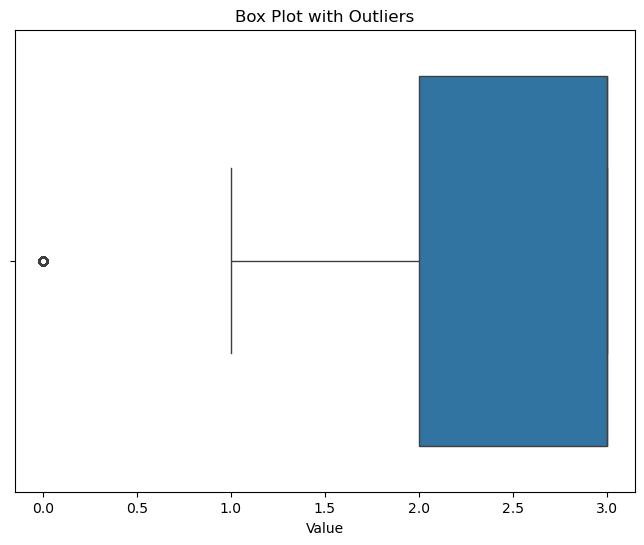

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Shipping Mode'])

plt.title('Box Plot with Outliers')
plt.xlabel('Value')

plt.show()

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

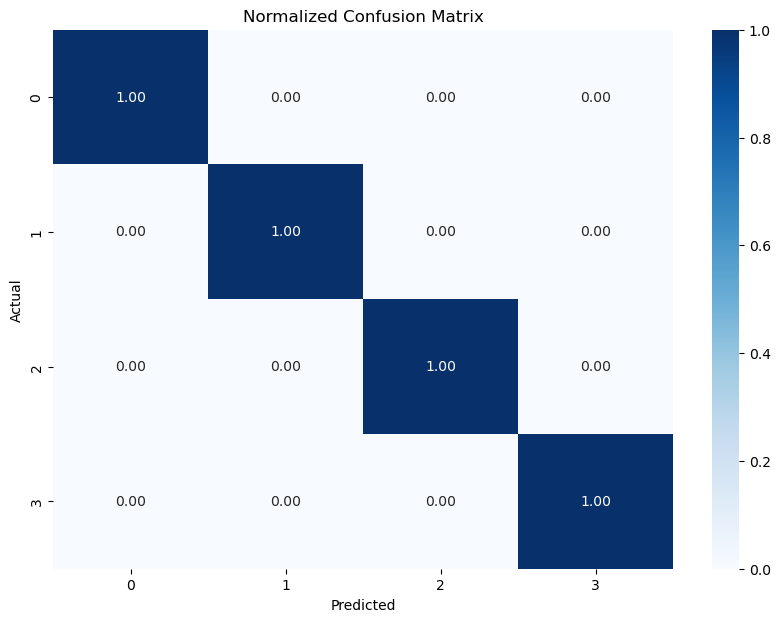

In [105]:

cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()


In [107]:
import numpy as np
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [109]:
y_prob = svm_model.predict_proba(X_test)[:, 1]

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Display AUC
print(f'AUC: {roc_auc:.2f}')

AUC: 1.00


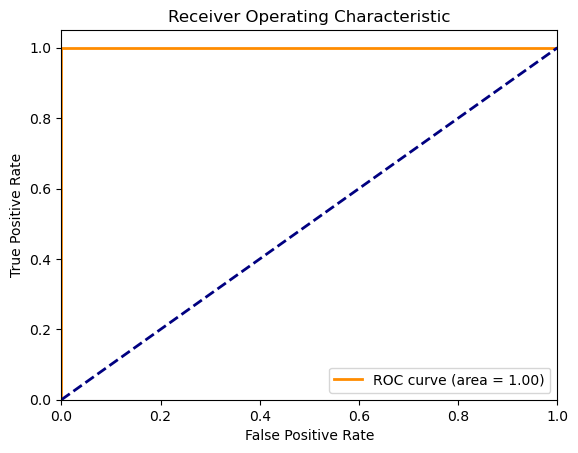

In [115]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [117]:

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [121]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob,pos_label=1)

# Optionally, display AUC for Precision-Recall curve
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

Precision-Recall AUC: 1.00


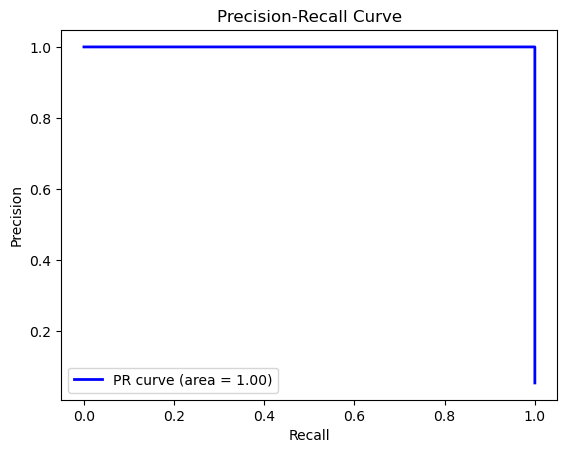

In [123]:
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


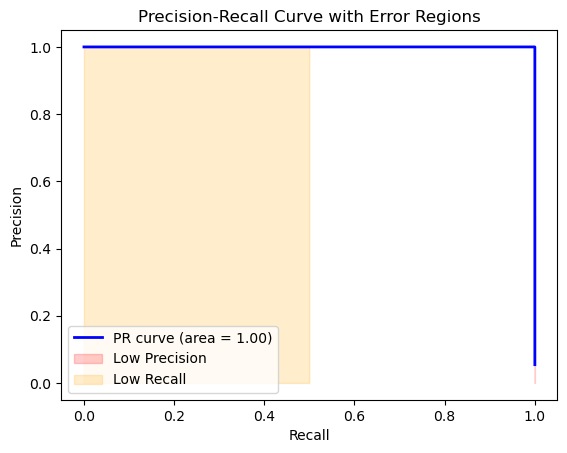

In [129]:
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')

low_precision_threshold = 0.5
low_recall_threshold = 0.5

plt.fill_between(recall, precision, where=(precision < low_precision_threshold), color='red', alpha=0.2, label='Low Precision')
plt.fill_between(recall, precision, where=(recall < low_recall_threshold), color='orange', alpha=0.2, label='Low Recall')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Error Regions')
plt.legend(loc='lower left')
plt.show()